# App Reviews Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Day031_reviews.csv')
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


# Exploratory Data Analysis

We will start analyzing the distribution of ratings. It will provide insight into overall sentiment of the reviews. Then we can explore further ,such as analyzing length of reviews, and possibly derive insights from the text of the reviews.

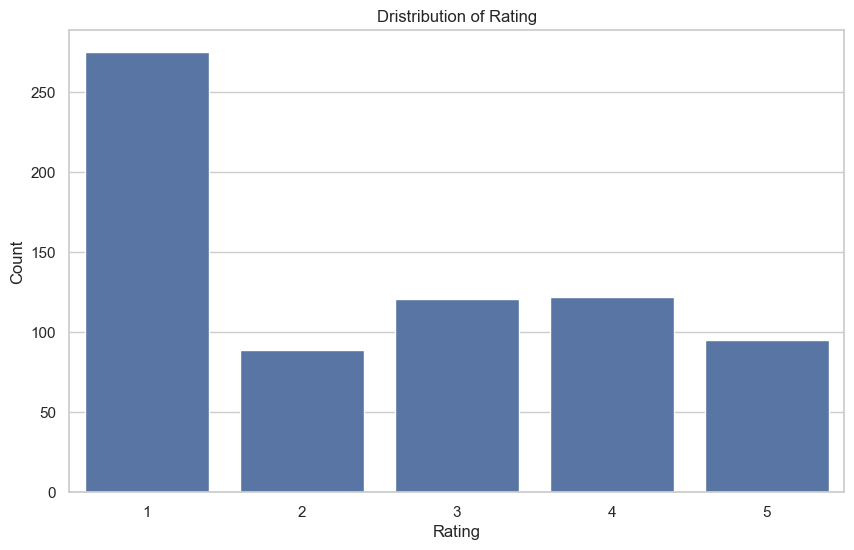

In [10]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Rating')
plt.title('Dristribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Adding sentiment Labels int the Data

We will Text library. Textblob provides a polarity scores raning from -1(very positive) for a given text 
We can use this score to classify each reviews sentiment as positive , negtive or neutral.

In [11]:
from textblob import TextBlob

In [12]:
def textblob_sentiment_analysis(review):
    sentiment=TextBlob(review).sentiment.polarity
    if sentiment>0.1:
        return 'Positive'
    elif sentiment<0:
        return 'Negative'
    else:
        return 'Neutral'
    

In [13]:
df['Sentiment']=df['Review'].apply(textblob_sentiment_analysis)


In [14]:
df.sample(5)

,Review,Rating,Sentiment
250,Great tool for linkedin. Wish is allowed for R...,4,Positive
97,Would give it 5 stars if it had a contact sync...,4,Positive
22,Not working on dhd,1,Neutral
207,Good app but need the ability to access group ...,4,Positive
63,Force closes no matter what you try and do.,1,Neutral


#Analyzing App Reviews Sentiments

In [15]:
sentiment_distribution=df['Sentiment'].value_counts()
sentiment_distribution

Sentiment
Positive    295
Neutral     265
Negative    142
Name: count, dtype: int64

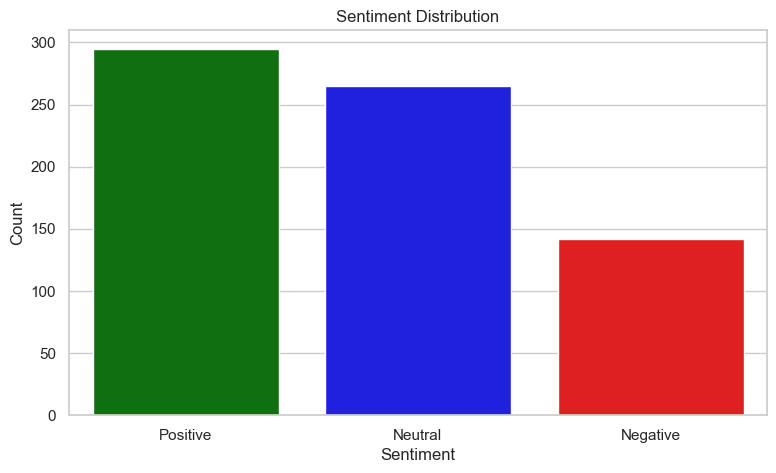

In [28]:
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index,
            y=sentiment_distribution.values,
            hue=sentiment_distribution.index,
            palette=[ 'green','blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

So, we can see althrough the app has low ratings, still the reviewrs don't use many negative words in the reviews for the app.

Next,we'll explore the relationship between the sentiments and the ratings. This alaysis can help us understand whether there is a correlation between the sentiment of the text and numerical raings.

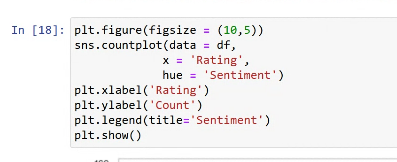

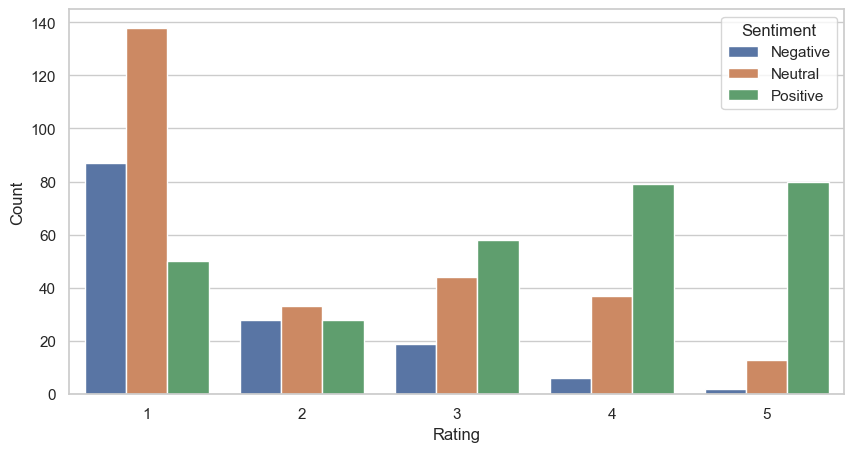

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,
              x='Rating',
              hue='Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

App Reviews Sentiment analysis is avaluable tool for app developers and business to understand user feedback,prioritieze feature updates and manintain a positive user community. It involves using data analaysis techniques to deternine wether the sentiments in these reviews are positive, negative or neutral.